In [30]:
import pandas as pd
from requests import get
import seaborn as sb
import matplotlib.pyplot as plt

<h1>1 - DataSet without lyrics<h1>

In [80]:
songs = pd.read_csv("songs.csv")

songs

,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,https://api.vagalume.com.br/search.php?art=Tra...
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,https://api.vagalume.com.br/search.php?art=Emi...
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,https://api.vagalume.com.br/search.php?art=Kes...
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,https://api.vagalume.com.br/search.php?art=Lad...
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,https://api.vagalume.com.br/search.php?art=Bru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,https://api.vagalume.com.br/search.php?art=Mar...
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,https://api.vagalume.com.br/search.php?art=Ed%...
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,https://api.vagalume.com.br/search.php?art=DJ%...
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,https://api.vagalume.com.br/search.php?art=Mar...


<h1>2 - Lyrics DataSets<h1>

In [75]:
ds = pd.read_csv("jb.csv", sep = ",", quotechar = '"', skipinitialspace = True).drop(columns = ["lyrics"]).reset_index().rename({'index': 'title1', 'title':'artist1', 'artist': 'lyrics'}, axis=1)

lyrics_jb = ds.rename({'title1': 'title', 'artist1': 'artist'}, axis=1)

lyrics_jb

,title,artist,lyrics
0,"Hey, Soul Sister",Train,Heyy He-e-e-e-ey He-e-e-e-ey [Verse 1] Your li...
1,Love The Way You Lie,Eminem,[Chorus: Rihanna] Just gonna stand there and w...
2,TiK ToK,Kesha,[Verse 1] Wake up in the morning feelin' like ...
3,Bad Romance,Lady Gaga,"[Intro] Oh-oh-oh-oh-oh, oh-oh-oh-oh, oh-oh-oh ..."
4,Just the Way You Are,Bruno Mars,"[Intro] Oh, oh-oh-oh Oh-oh-oh-oh Oh-oh-oh [Ver..."
...,...,...,...
290,Elastic Heart,Sia,"I won't give up, I won't give up I won't give ..."
291,Rather Be (feat. Jess Glynne),Clean Bandit,"Ooh, oh-oh [Verse 1: Jess Glynne] We're a thou..."
292,Hello,Adele,"Hello, it's me I was wondering if after all th..."
293,Dear Future Husband,Meghan Trainor,Dear future husband Here's a few things you'll...


In [79]:
# Import songs dataset and remove useless cols
# Split on index == 299 i.e 'Hey Mama' -> split fideles
songs_fideles = pd.read_csv('songs.csv') \
    .drop(columns=['index', 'acous', 'spch', 'pop']) \
    .iloc[299:, :] \
    .reset_index(drop=True) \
    .rename({'top genre': 'genre'}, axis=1)

# Import lyrics dataset
# (removed {}, removed all (, replaced all ): for a comma, changed file type to .csv)
lyrics = pd.read_csv(
        "datasets/fideles.csv",
        sep=",",
        quotechar='"',
        skipinitialspace=True
    ) \
    .drop(columns=['lyrics']) \
    .reset_index() \
    .rename(
        {
            'index':'title1',
            'title':'artist1',
            'artist':'lyrics'
        }, axis=1
    )

lyrics_fideles = lyrics.rename({'title1': 'title', 'artist1':'artist'}, axis=1)

# Add lyrics column
songs_fideles['lyrics'] = lyrics['lyrics']

display(songs_fideles)
display(lyrics_fideles)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,url,lyrics
0,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,dance pop,2015,86,73,60,-4,33,53,193,https://api.vagalume.com.br/search.php?art=Dav...,"[Intro: Alan Lomax, Bebe Rexha] Be my woman, g..."
1,Genie In a Bottle,Christina Aguilera,dance pop,2015,176,80,63,-7,14,91,218,https://api.vagalume.com.br/search.php?art=Chr...,"[Intro] (Come on, come on, uh, yeah) Oh-ooh, w..."
2,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,https://api.vagalume.com.br/search.php?art=Jus...,"[Chorus] Can we, we keep Keep each other compa..."
3,Sing,Ed Sheeran,pop,2015,120,67,82,-4,6,94,235,https://api.vagalume.com.br/search.php?art=Ed%...,[Verse 1] It's late in the evening Glass on th...
4,Jealous - Remix,Nick Jonas,dance pop,2015,93,71,68,-4,44,45,222,https://api.vagalume.com.br/search.php?art=Nic...,"[Intro: Tinashe] Uhh, mmm Nick J Tinashe It's ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,https://api.vagalume.com.br/search.php?art=Mar...,I'll try to pass the night away with somebody ...
300,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,https://api.vagalume.com.br/search.php?art=Ed%...,"Anything she need, she can call me Don't worry..."
301,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,https://api.vagalume.com.br/search.php?art=DJ%...,We the Best Music! Another one! DJ Khaled! You...
302,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,https://api.vagalume.com.br/search.php?art=Mar...,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


,title,artist,lyrics
0,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,"[Intro: Alan Lomax, Bebe Rexha] Be my woman, g..."
1,Genie In a Bottle,Christina Aguilera,"[Intro] (Come on, come on, uh, yeah) Oh-ooh, w..."
2,Company,Justin Bieber,"[Chorus] Can we, we keep Keep each other compa..."
3,Sing,Ed Sheeran,[Verse 1] It's late in the evening Glass on th...
4,Jealous - Remix,Nick Jonas,"[Intro: Tinashe] Uhh, mmm Nick J Tinashe It's ..."
...,...,...,...
299,Find U Again (feat. Camila Cabello),Mark Ronson,I'll try to pass the night away with somebody ...
300,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,"Anything she need, she can call me Don't worry..."
301,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,We the Best Music! Another one! DJ Khaled! You...
302,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


In [82]:
#check for the song without data

display(songs[songs['dnce'] == 0])
print('-------------------------------------')
display(songs[songs['nrgy'] == 0])
print('-------------------------------------')
display(songs[songs['live'] == 0])
print('-------------------------------------')

display(lyrics_jb[lyrics_jb['title'] == 'Million Years Ago'])
print(lyrics_jb[lyrics_jb['title'] == 'Million Years Ago'])
lyrics_jb = lyrics_jb.drop([143])



,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


,title,artist,lyrics


Empty DataFrame
Columns: [title, artist, lyrics]
Index: []


In [83]:
display(lyrics_jb)

,title,artist,lyrics
0,"Hey, Soul Sister",Train,Heyy He-e-e-e-ey He-e-e-e-ey [Verse 1] Your li...
1,Love The Way You Lie,Eminem,[Chorus: Rihanna] Just gonna stand there and w...
2,TiK ToK,Kesha,[Verse 1] Wake up in the morning feelin' like ...
3,Bad Romance,Lady Gaga,"[Intro] Oh-oh-oh-oh-oh, oh-oh-oh-oh, oh-oh-oh ..."
4,Just the Way You Are,Bruno Mars,"[Intro] Oh, oh-oh-oh Oh-oh-oh-oh Oh-oh-oh [Ver..."
...,...,...,...
290,Elastic Heart,Sia,"I won't give up, I won't give up I won't give ..."
291,Rather Be (feat. Jess Glynne),Clean Bandit,"Ooh, oh-oh [Verse 1: Jess Glynne] We're a thou..."
292,Hello,Adele,"Hello, it's me I was wondering if after all th..."
293,Dear Future Husband,Meghan Trainor,Dear future husband Here's a few things you'll...


In [89]:
#Concatenate both our datasets
lyrics = pd.concat([lyrics_jb, lyrics_fideles], axis=0).reset_index().drop(columns={"index"})

lyrics

,title,artist,lyrics
0,"Hey, Soul Sister",Train,Heyy He-e-e-e-ey He-e-e-e-ey [Verse 1] Your li...
1,Love The Way You Lie,Eminem,[Chorus: Rihanna] Just gonna stand there and w...
2,TiK ToK,Kesha,[Verse 1] Wake up in the morning feelin' like ...
3,Bad Romance,Lady Gaga,"[Intro] Oh-oh-oh-oh-oh, oh-oh-oh-oh, oh-oh-oh ..."
4,Just the Way You Are,Bruno Mars,"[Intro] Oh, oh-oh-oh Oh-oh-oh-oh Oh-oh-oh [Ver..."
...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,I'll try to pass the night away with somebody ...
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,"Anything she need, she can call me Don't worry..."
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,We the Best Music! Another one! DJ Khaled! You...
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


## 3 - Cleaning lyrics dataset

In [91]:
# 1 - Remove content between []
from re import sub
lyrics['lyrics'] = lyrics.apply(
    lambda row: sub(r'\[.*?\]', '', row['lyrics']),
    axis=1
)

lyrics

,title,artist,lyrics
0,"Hey, Soul Sister",Train,Heyy He-e-e-e-ey He-e-e-e-ey Your lipstick st...
1,Love The Way You Lie,Eminem,Just gonna stand there and watch me burn? Wel...
2,TiK ToK,Kesha,Wake up in the morning feelin' like P. Diddy ...
3,Bad Romance,Lady Gaga,"Oh-oh-oh-oh-oh, oh-oh-oh-oh, oh-oh-oh Caught ..."
4,Just the Way You Are,Bruno Mars,"Oh, oh-oh-oh Oh-oh-oh-oh Oh-oh-oh Oh, her ey..."
...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,I'll try to pass the night away with somebody ...
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,"Anything she need, she can call me Don't worry..."
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,We the Best Music! Another one! DJ Khaled! You...
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


In [93]:
# 2 - Remove all punctuation from lyrics except single quotes ('')
# and lowercase all words
import string

lyrics['lyrics'] = lyrics.apply(
    lambda row: row['lyrics'].translate(
        str.maketrans('', '', string.punctuation.replace("'", ""))
        ).lower(),
    axis=1
)

lyrics

,title,artist,lyrics
0,"Hey, Soul Sister",Train,heyy heeeeey heeeeey your lipstick stains on ...
1,Love The Way You Lie,Eminem,just gonna stand there and watch me burn well...
2,TiK ToK,Kesha,wake up in the morning feelin' like p diddy h...
3,Bad Romance,Lady Gaga,ohohohohoh ohohohoh ohohoh caught in a bad ro...
4,Just the Way You Are,Bruno Mars,oh ohohoh ohohohoh ohohoh oh her eyes her ey...
...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,i'll try to pass the night away with somebody ...
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,anything she need she can call me don't worry ...
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,we the best music another one dj khaled you st...
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,mmmm ah ah mmmmmmmmmmmmmm christmas is a time ...


In [95]:
# 3 - Tokenize
from nltk.tokenize import wordpunct_tokenize

lyrics['tokenized_lyrics'] = lyrics.apply(
    lambda row: wordpunct_tokenize(row['lyrics']), axis=1
)

lyrics

,title,artist,lyrics,tokenized_lyrics
0,"Hey, Soul Sister",Train,heyy heeeeey heeeeey your lipstick stains on ...,"[heyy, heeeeey, heeeeey, your, lipstick, stain..."
1,Love The Way You Lie,Eminem,just gonna stand there and watch me burn well...,"[just, gonna, stand, there, and, watch, me, bu..."
2,TiK ToK,Kesha,wake up in the morning feelin' like p diddy h...,"[wake, up, in, the, morning, feelin, ', like, ..."
3,Bad Romance,Lady Gaga,ohohohohoh ohohohoh ohohoh caught in a bad ro...,"[ohohohohoh, ohohohoh, ohohoh, caught, in, a, ..."
4,Just the Way You Are,Bruno Mars,oh ohohoh ohohohoh ohohoh oh her eyes her ey...,"[oh, ohohoh, ohohohoh, ohohoh, oh, her, eyes, ..."
...,...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,i'll try to pass the night away with somebody ...,"[i, ', ll, try, to, pass, the, night, away, wi..."
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,anything she need she can call me don't worry ...,"[anything, she, need, she, can, call, me, don,..."
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,we the best music another one dj khaled you st...,"[we, the, best, music, another, one, dj, khale..."
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,mmmm ah ah mmmmmmmmmmmmmm christmas is a time ...,"[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ..."


In [97]:
# 4 - Apply POS-tagging
from nltk.tag import pos_tag

lyrics['tagged_lyrics'] = lyrics.apply(
    lambda row: pos_tag(row['tokenized_lyrics'], tagset='universal'), axis=1
)

lyrics

,title,artist,lyrics,tokenized_lyrics,tagged_lyrics
0,"Hey, Soul Sister",Train,heyy heeeeey heeeeey your lipstick stains on ...,"[heyy, heeeeey, heeeeey, your, lipstick, stain...","[(heyy, NOUN), (heeeeey, NOUN), (heeeeey, VERB..."
1,Love The Way You Lie,Eminem,just gonna stand there and watch me burn well...,"[just, gonna, stand, there, and, watch, me, bu...","[(just, ADV), (gonna, NOUN), (stand, VERB), (t..."
2,TiK ToK,Kesha,wake up in the morning feelin' like p diddy h...,"[wake, up, in, the, morning, feelin, ', like, ...","[(wake, VERB), (up, PRT), (in, ADP), (the, DET..."
3,Bad Romance,Lady Gaga,ohohohohoh ohohohoh ohohoh caught in a bad ro...,"[ohohohohoh, ohohohoh, ohohoh, caught, in, a, ...","[(ohohohohoh, ADJ), (ohohohoh, VERB), (ohohoh,..."
4,Just the Way You Are,Bruno Mars,oh ohohoh ohohohoh ohohoh oh her eyes her ey...,"[oh, ohohoh, ohohohoh, ohohoh, oh, her, eyes, ...","[(oh, X), (ohohoh, VERB), (ohohohoh, VERB), (o..."
...,...,...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,i'll try to pass the night away with somebody ...,"[i, ', ll, try, to, pass, the, night, away, wi...","[(i, NOUN), (', .), (ll, ADJ), (try, NOUN), (t..."
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,anything she need she can call me don't worry ...,"[anything, she, need, she, can, call, me, don,...","[(anything, NOUN), (she, PRON), (need, ADP), (..."
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,we the best music another one dj khaled you st...,"[we, the, best, music, another, one, dj, khale...","[(we, PRON), (the, DET), (best, ADJ), (music, ..."
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,mmmm ah ah mmmmmmmmmmmmmm christmas is a time ...,"[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ...","[(mmmm, NOUN), (ah, NOUN), (ah, NOUN), (mmmmmm..."


In [98]:
# 5 - Lemmatize -> transform plurals to singular
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

lyrics['lemmatized_lyrics'] = lyrics.apply(
    lambda row: [
        lem.lemmatize(word)
        for word in row['tokenized_lyrics']
    ],
    axis=1
)

lyrics

,title,artist,lyrics,tokenized_lyrics,tagged_lyrics,lemmatized_lyrics
0,"Hey, Soul Sister",Train,heyy heeeeey heeeeey your lipstick stains on ...,"[heyy, heeeeey, heeeeey, your, lipstick, stain...","[(heyy, NOUN), (heeeeey, NOUN), (heeeeey, VERB...","[heyy, heeeeey, heeeeey, your, lipstick, stain..."
1,Love The Way You Lie,Eminem,just gonna stand there and watch me burn well...,"[just, gonna, stand, there, and, watch, me, bu...","[(just, ADV), (gonna, NOUN), (stand, VERB), (t...","[just, gonna, stand, there, and, watch, me, bu..."
2,TiK ToK,Kesha,wake up in the morning feelin' like p diddy h...,"[wake, up, in, the, morning, feelin, ', like, ...","[(wake, VERB), (up, PRT), (in, ADP), (the, DET...","[wake, up, in, the, morning, feelin, ', like, ..."
3,Bad Romance,Lady Gaga,ohohohohoh ohohohoh ohohoh caught in a bad ro...,"[ohohohohoh, ohohohoh, ohohoh, caught, in, a, ...","[(ohohohohoh, ADJ), (ohohohoh, VERB), (ohohoh,...","[ohohohohoh, ohohohoh, ohohoh, caught, in, a, ..."
4,Just the Way You Are,Bruno Mars,oh ohohoh ohohohoh ohohoh oh her eyes her ey...,"[oh, ohohoh, ohohohoh, ohohoh, oh, her, eyes, ...","[(oh, X), (ohohoh, VERB), (ohohohoh, VERB), (o...","[oh, ohohoh, ohohohoh, ohohoh, oh, her, eye, h..."
...,...,...,...,...,...,...
593,Find U Again (feat. Camila Cabello),Mark Ronson,i'll try to pass the night away with somebody ...,"[i, ', ll, try, to, pass, the, night, away, wi...","[(i, NOUN), (', .), (ll, ADJ), (try, NOUN), (t...","[i, ', ll, try, to, pas, the, night, away, wit..."
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,anything she need she can call me don't worry ...,"[anything, she, need, she, can, call, me, don,...","[(anything, NOUN), (she, PRON), (need, ADP), (...","[anything, she, need, she, can, call, me, don,..."
595,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,we the best music another one dj khaled you st...,"[we, the, best, music, another, one, dj, khale...","[(we, PRON), (the, DET), (best, ADJ), (music, ...","[we, the, best, music, another, one, dj, khale..."
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,mmmm ah ah mmmmmmmmmmmmmm christmas is a time ...,"[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ...","[(mmmm, NOUN), (ah, NOUN), (ah, NOUN), (mmmmmm...","[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ..."


In [84]:
#songs dataset without the song without data

songs = pd.read_csv("songs.csv")
songs = songs.drop(songs.columns[[0]], axis=1)

display(songs)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,https://api.vagalume.com.br/search.php?art=Tra...
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,https://api.vagalume.com.br/search.php?art=Emi...
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,https://api.vagalume.com.br/search.php?art=Kes...
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,https://api.vagalume.com.br/search.php?art=Lad...
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,https://api.vagalume.com.br/search.php?art=Bru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,https://api.vagalume.com.br/search.php?art=Mar...
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,https://api.vagalume.com.br/search.php?art=Ed%...
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,https://api.vagalume.com.br/search.php?art=DJ%...
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,https://api.vagalume.com.br/search.php?art=Mar...


<h1>4 - EDA<h1>

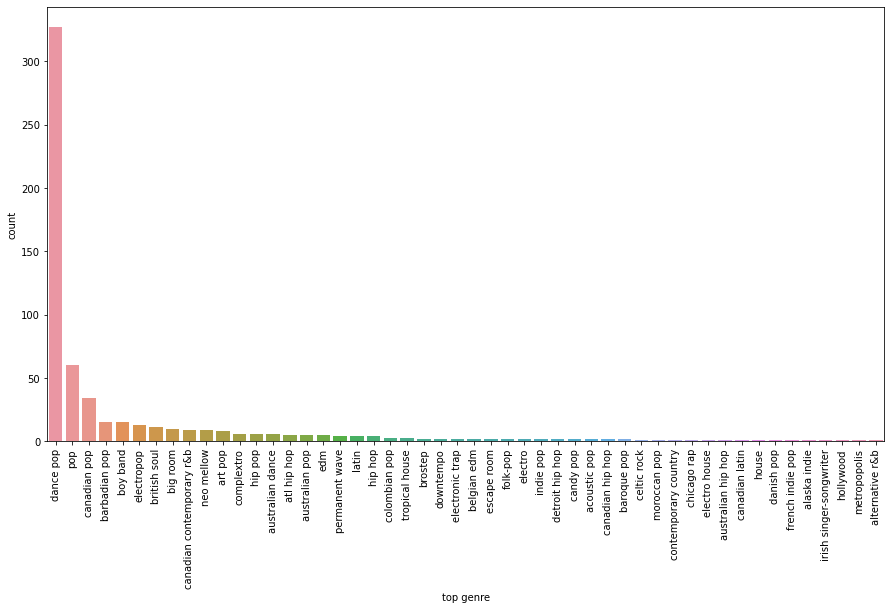

In [102]:
# Group songs by genre and absolute frequency
genres = pd.DataFrame(songs['top genre'].value_counts()).reset_index().rename({'top genre': 'count', 'index':'top genre'}, axis=1)
fig = plt.figure(figsize = (15,8))
ax = sb.barplot(x=genres['top genre'], y=genres['count'])
labels = plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 [Text(0, 0, '120'),
  Text(1, 0, '100'),
  Text(2, 0, '128'),
  Text(3, 0, '130'),
  Text(4, 0, '125'),
  Text(5, 0, '126'),
  Text(6, 0, '122'),
  Text(7, 0, '95'),
  Text(8, 0, '124'),
  Text(9, 0, '127'),
  Text(10, 0, '105'),
  Text(11, 0, '110'),
  Text(12, 0, '104'),
  Text(13, 0, '93'),
  Text(14, 0, '102'),
  Text(15, 0, '92'),
  Text(16, 0, '108'),
  Text(17, 0, '94'),
  Text(18, 0, '140'),
  Text(19,

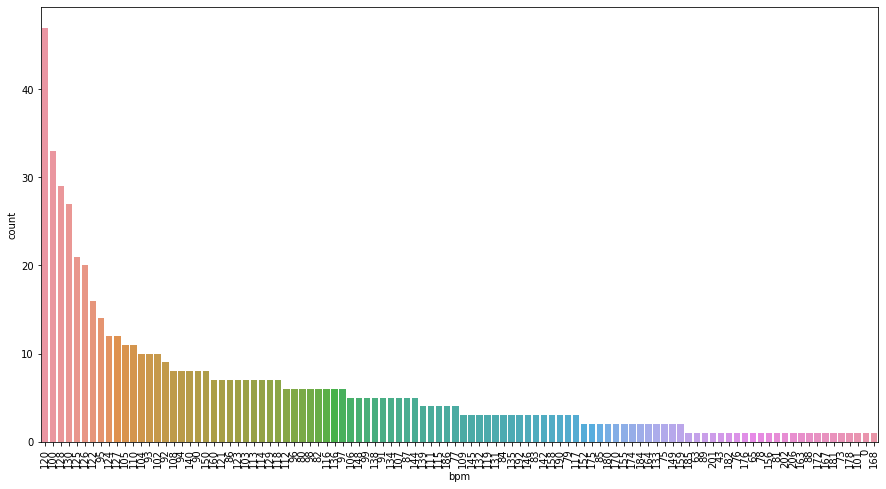

In [104]:
# Group songs by bpms and absolute frequency
bpms = pd.DataFrame(songs['bpm'].value_counts(sort=True)).reset_index().rename({'index':'bpm1', 'bpm':'count'}, axis=1)
bpms = bpms.rename({'bpm1': 'bpm'}, axis=1).sort_values(by='count', ascending=False)
fig = plt.figure(figsize = (15,8))
ax = sb.barplot(x=bpms['bpm'], y=bpms['count'], order=bpms['bpm'])
plt.xticks(rotation=90)

In [119]:
def plotByYear(df, years, x, y):
    fig = plt.figure(figsize=(25, 12))
    fig.subplots_adjust(hspace=4, wspace=0.2)
    for year in years:
        to_plot = df.loc[year].reset_index()
        sb.barplot(x=to_plot[x], y=to_plot[y], ax=fig.add_subplot(4, 3, years.index(year) + 1))
        plt.xticks(rotation=90)
        plt.title(str(year))
    plt.show()

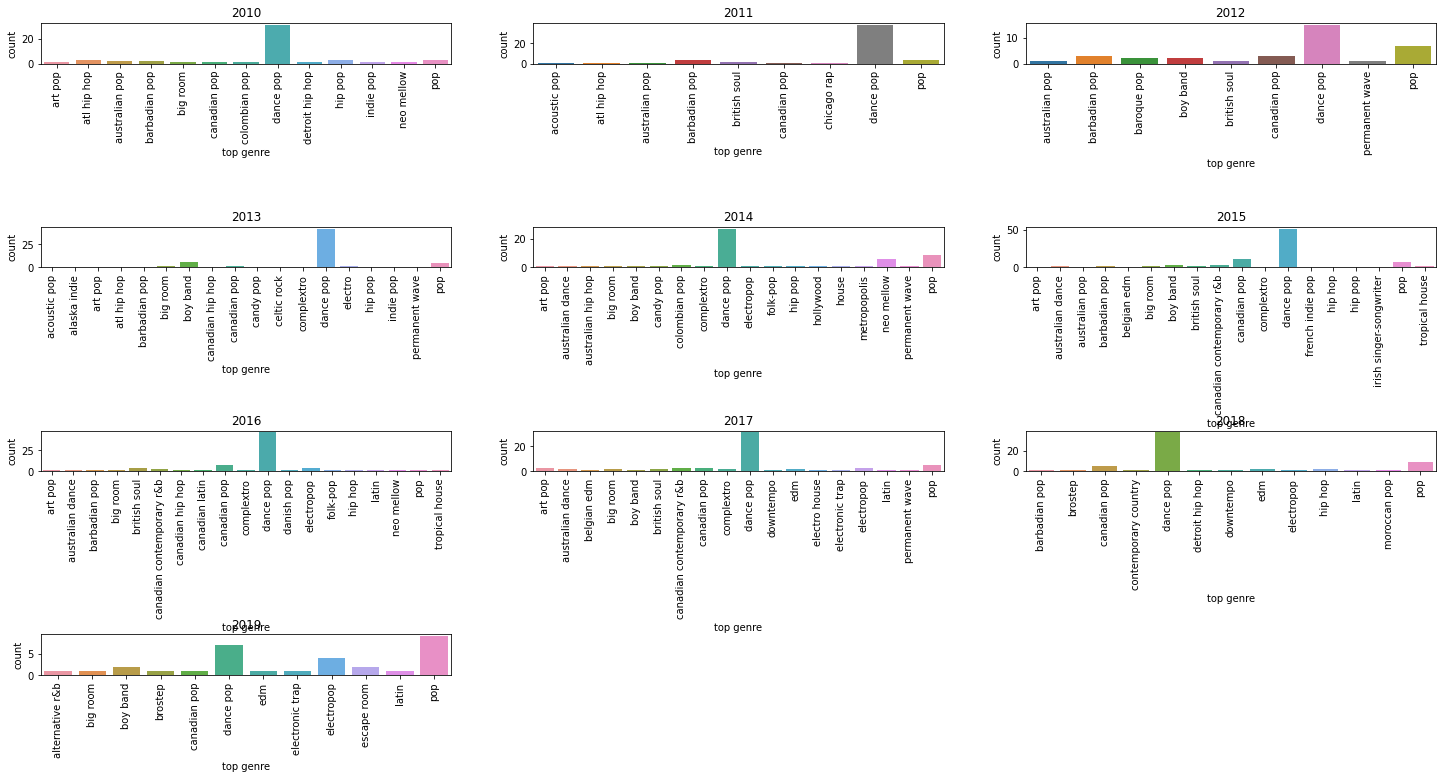

In [120]:
# Yearly analysis
groups = songs.groupby(['year', 'top genre'])
yearly_genre_count = groups.count()[['title']].rename({'title': 'count'}, axis=1)

plotByYear(yearly_genre_count, [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'top genre', 'count')

In [20]:
#max duration and min duration

max_dur = songs['dur'].max()
display(max_dur)

min_dur = songs['dur'].min()
display(min_dur)

durations = songs[['title', 'dur']].sort_values(by='dur', ascending=False)
display(durations)

424

134

,title,dur
188,TKO,424
422,Wish That You Were Here,403
63,Monster,379
162,Lose Yourself to Dance,354
194,Take Back the Night,353
...,...,...
581,Good as Hell (feat. Ariana Grande) - Remix,159
492,Reality (feat. Janieck Devy) - Radio Edit,158
174,I Love It (feat. Charli XCX),157
591,All Around The World (La La La),148


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

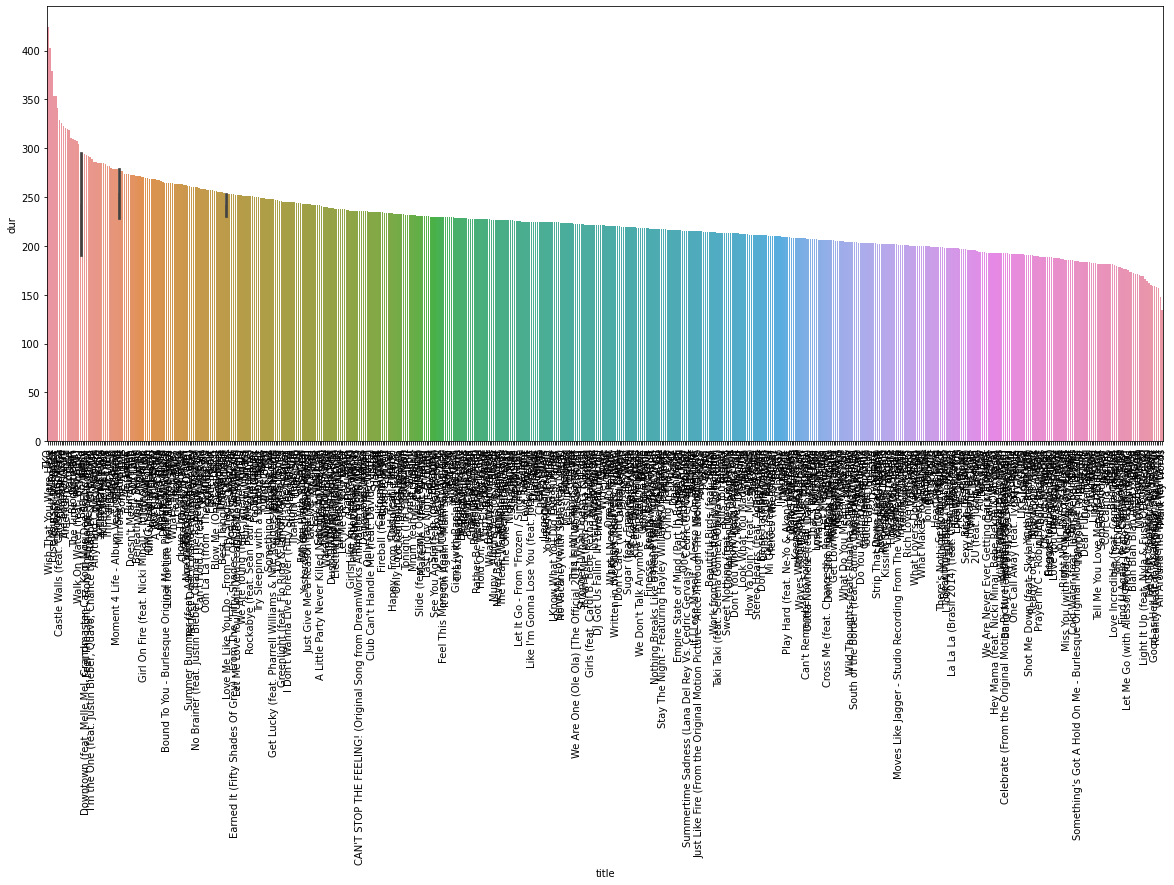

In [122]:
fig = plt.figure(figsize = (20, 8))
ax = sb.barplot(x = 'title', y = 'dur', data = durations)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='dur', ylabel='Count'>

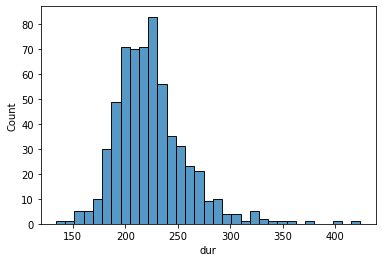

In [22]:
sb.histplot(data=durations, x = 'dur')

In [23]:
#max liveness and min liveness

max_dur = songs['live'].max()
display(max_dur)

min_dur = songs['live'].min()
display(min_dur)

livenesss = songs[['title', 'live']].sort_values(by='live', ascending=False)

74

0

<AxesSubplot:xlabel='live', ylabel='Count'>

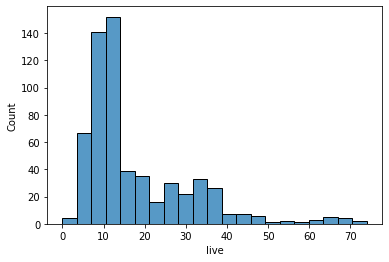

In [24]:
sb.histplot(data=livenesss, x = 'live')

In [25]:
#max energy and min energy

max_dur = songs['nrgy'].max()
display(max_dur)

min_dur = songs['nrgy'].min()
display(min_dur)

energys = songs[['title', 'nrgy']].sort_values(by='nrgy', ascending=False)

98

0

<AxesSubplot:xlabel='nrgy', ylabel='Count'>

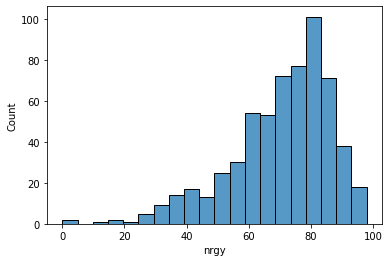

In [26]:
sb.histplot(data=energys, x = 'nrgy')

In [27]:
#max danceability and min danceability

max_dur = songs['dnce'].max()
display(max_dur)

min_dur = songs['dnce'].min()
display(min_dur)

dance = songs[['title', 'dnce']].sort_values(by='dnce', ascending=False)

97

0

<AxesSubplot:xlabel='dnce', ylabel='Count'>

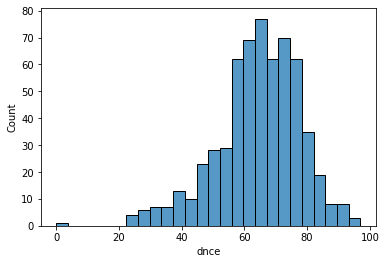

In [28]:
sb.histplot(data=dance, x = 'dnce')

In [131]:
from nltk import FreqDist

# 1 - Get tag frequency distribution for each song
tag_fd = pd.DataFrame(lyrics.apply(
    lambda row: dict(FreqDist(tag for (_, tag) in row['tagged_lyrics'])), axis=1
)).rename({0: 'fd'}, axis=1)

tagset, counts = [
    'ADJ', 'ADP', 'ADV',
    'CONJ', 'DET', 'NOUN',
    'NUM', 'PRT', 'PRON',
    'VERB', '.', 'X'
], []

# Get total tag distribution for all songs
for tag in tagset:
    tagcount = 0
    for i in range(len(tag_fd)):
        tagcount += tag_fd.iloc[i]['fd'].get(tag, 0)
    counts += [tagcount]


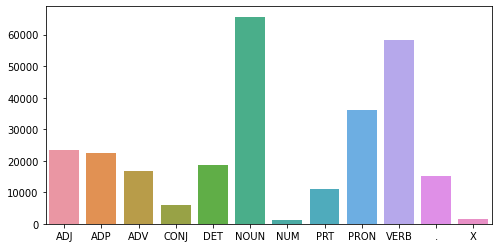

In [133]:
# Plot tag frequency distribution
fig = plt.figure(figsize = (8,4))
ax = sb.barplot(x=tagset, y=counts)

# @TODO - perguntar ao Jb se ficamos só com a classe NOUN. Frequencia > 30k para 300 músicas
# Sentiment analysis nas palavras

In [134]:
# Remove words not tagged with 'NOUN' or 'ADJ'
lyrics['filtered_lyrics'] = lyrics.apply(
    lambda row: [s for s in row['tagged_lyrics'] if s[1] in ['NOUN', 'ADJ']],
    axis=1
)

lyrics.head()[['tagged_lyrics', 'filtered_lyrics']]

,tagged_lyrics,filtered_lyrics
0,"[(heyy, NOUN), (heeeeey, NOUN), (heeeeey, VERB...","[(heyy, NOUN), (heeeeey, NOUN), (lipstick, NOU..."
1,"[(just, ADV), (gonna, NOUN), (stand, VERB), (t...","[(gonna, NOUN), (right, NOUN), (i, NOUN), (way..."
2,"[(wake, VERB), (up, PRT), (in, ADP), (the, DET...","[(morning, NOUN), (feelin, NOUN), (p, NOUN), (..."
3,"[(ohohohohoh, ADJ), (ohohohoh, VERB), (ohohoh,...","[(ohohohohoh, ADJ), (caught, NOUN), (bad, ADJ)..."
4,"[(oh, X), (ohohoh, VERB), (ohohohoh, VERB), (o...","[(ohohoh, ADJ), (eyes, NOUN), (eyes, NOUN), (s..."


to do - filter the genres(ex. canadian pop -> pop)